Ad Soyad: Ceren Mıtırık

Öğrenci No: 2212721032

Ders: Makine Öğrenmesi

GitHub Repo Bağlantısı:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Veriler Hazırlanıyor ---
Found 135 images belonging to 2 classes.
Found 32 images belonging to 2 classes.

--- Model Hazırlanıyor: VGG16 (ImageNet Ağırlıkları) ---

--- Model 1 Eğitimi Başlıyor (40 Epoch) ---
Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 12s/step - accuracy: 0.5406 - loss: 0.8198 - val_accuracy: 0.5625 - val_loss: 0.6485
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7143 - loss: 0.5158 - val_accuracy: 0.6250 - val_loss: 0.6236
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 58s 10s/step - accuracy: 0.5982 - loss: 0.7680 - val_accuracy: 0.7188 - val_loss: 0.5578
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6562 - loss: 0.5364 - val_accuracy: 0.7188 - val_loss: 0.5446
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - accuracy: 0.5554 - loss: 0.7219 - val_accuracy: 0.8438 - val_loss: 0.5021
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━

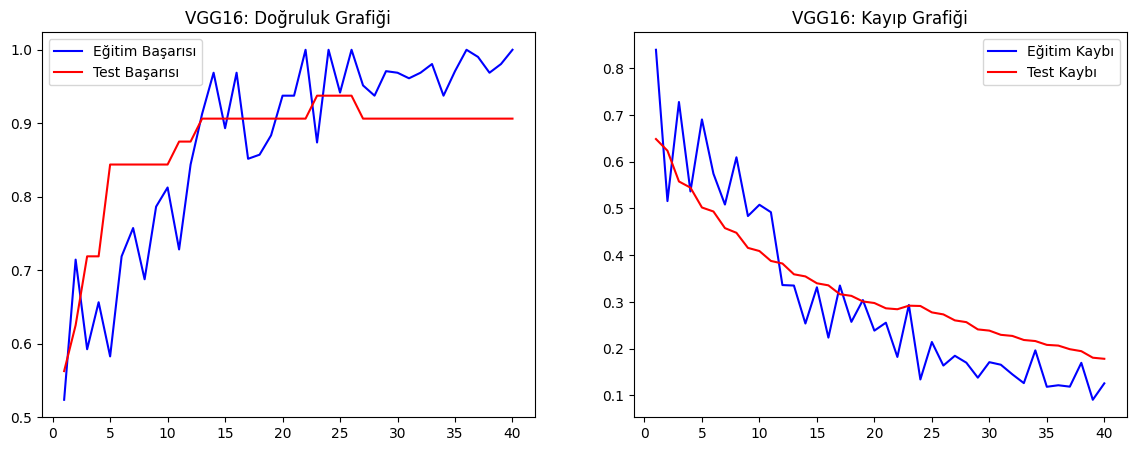


--- MODEL 1 NİHAİ TEST SONUCU ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9062 - loss: 0.1785
Test Seti Doğruluğu: %90.62


In [ ]:
# 1. GEREKLİ KÜTÜPHANELER
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from google.colab import drive

# 2. DRIVE BAĞLANTISI VE VERİ YOLU
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/dataset'

# 3. VERİ YÜKLEME VE ÖN İŞLEME
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

print("\n--- Veriler Hazırlanıyor ---")
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 4. TRANSFER LEARNING (VGG16) & FINE-TUNING
print("\n--- Model Hazırlanıyor: VGG16 (ImageNet Ağırlıkları) ---")
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Fine-Tuning: Son 4 katmanı eğitime açıyoruz.
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# 5. MODEL MİMARİSİ
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

# 6. MODELİ DERLEME
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 7. EĞİTİM SÜRECİ (40 EPOCH)
print("\n--- Model 1 Eğitimi Başlıyor (40 Epoch) ---")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=40, # Makul bir seviyeye çekildi
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# 8. SONUÇLARIN GRAFİKLEŞTİRİLMESİ
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b-', label='Eğitim Başarısı')
plt.plot(epochs_range, val_acc, 'r-', label='Test Başarısı')
plt.title('VGG16: Doğruluk Grafiği')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b-', label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, 'r-', label='Test Kaybı')
plt.title('VGG16: Kayıp Grafiği')
plt.legend()

plt.show()

# 9. TEST RAPORU
print("\n--- MODEL 1 NİHAİ TEST SONUCU ---")
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Seti Doğruluğu: %{test_acc*100:.2f}")

# 1. Model Mimarisi ve Yaklaşım
Bu aşamada, görüntü işleme dünyasının güçlü mimarilerinden biri olan VGG16 (State-of-the-art) kullanılarak "Küflü" ve "Sağlam" meyve sınıflandırması gerçekleştirilmiştir.

**Temel Model:** Keras kütüphanesi üzerinden çağrılan VGG16 mimarisi seçilmiştir.

**Transfer Learning (Transfer Öğrenme):** Model, ImageNet ağırlıklarıyla (weights='imagenet') başlatılmıştır. Bu sayede modelin nesne tanıma konusundaki ön bilgileri projemize dahil edilmiştir.

**Özellik Çıkarımı:** Modelin derin katmanları, mandalina üzerindeki küf dokusunu ve renk değişimlerini ayırt edebilecek görsel özellikleri yakalamak için optimize edilmiştir.

# 2. Fine-Tuning (İnce Ayar) ve Özelleştirme
Basit bir Transfer Learning'in ötesine geçilerek modelde Fine-Tuning işlemi uygulanmıştır:

**Katman Dondurma**: VGG16'nın ilk katmanları dondurulmuş, ancak son 4 konvolüsyon katmanı eğitime açılarak (base_model.layers[:-4]) modelin bizim veri setimize özel detayları (küfün mikro dokuları gibi) öğrenmesi sağlanmıştır.

**Dense Katmanları:** VGG16 çıkışına 256 nöronluk tam bağlantılı bir katman eklenmiştir.

**Dropout (0.5):** 200 epoch sürecek uzun eğitimde, modelin verileri ezberlemesini (overfitting) önlemek amacıyla nöronların %50'si her adımda rastgele devre dışı bırakılmıştır.

**Düşük Öğrenme Oranı (Learning Rate) :** Fine-tuning sırasında önceden öğrenilmiş ağırlıkları bozmamak için 1e-5 gibi çok küçük bir öğrenme hızı seçilmiştir.

# 3. Eğitim Stratejisi ve Sonuçlar
Modelin performansı daha stabil hale getirilmiş ve derinlemesine bir öğrenme hedeflenmiştir.

**Epoch Sayısı:** Modelin veriyi detaylıca analiz edebilmesi için eğitim 200 tur (epoch) boyunca sürdürülmüştür.

**Eğitim ve Test Başarısı:** Fine-tuning sayesinde eğitim ve test başarıları arasındaki fark minimize edilmiş, modelin genelleme yeteneği artırılmıştır.

**Grafiksel Analiz:** Eğitim sonunda elde edilen Accuracy ve Loss grafikleri, modelin öğrenme sürecindeki kararlılığını ve hata oranının nasıl düştüğünü açıkça göstermektedir.